In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('./datapenumpang.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,08.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,144.542,NaN,C
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,77.417,NaN,Q
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,78.542,NaN,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26,NaN,S


In [3]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
dtype: object


In [5]:
data['Fare'] = pd.to_numeric(data['Fare'], errors='coerce')
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,707.000000,707.000000,707.000000,707,707,562.000000,707.000000,707.000000,707,688.000000,159,706
unique,NaN,NaN,NaN,707,2,NaN,NaN,NaN,563,NaN,121,3
top,NaN,NaN,NaN,"Kelly, Mrs. Florence ""Fannie""",male,NaN,NaN,NaN,CA 2144,NaN,G6,S
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,6,NaN,4,506
mean,354.000000,0.387553,2.308345,NaN,NaN,30.034253,0.530410,0.383310,NaN,92.505605,NaN,NaN
std,204.237607,0.487537,0.835458,NaN,NaN,14.626759,1.067214,0.815157,NaN,161.526268,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.750000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,177.500000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,10.500000,NaN,NaN
50%,354.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,27.750000,NaN,NaN
75%,530.500000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,78.958000,NaN,NaN


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            145
SibSp            0
Parch            0
Ticket           0
Fare            19
Cabin          548
Embarked         1
dtype: int64

<Axes: >

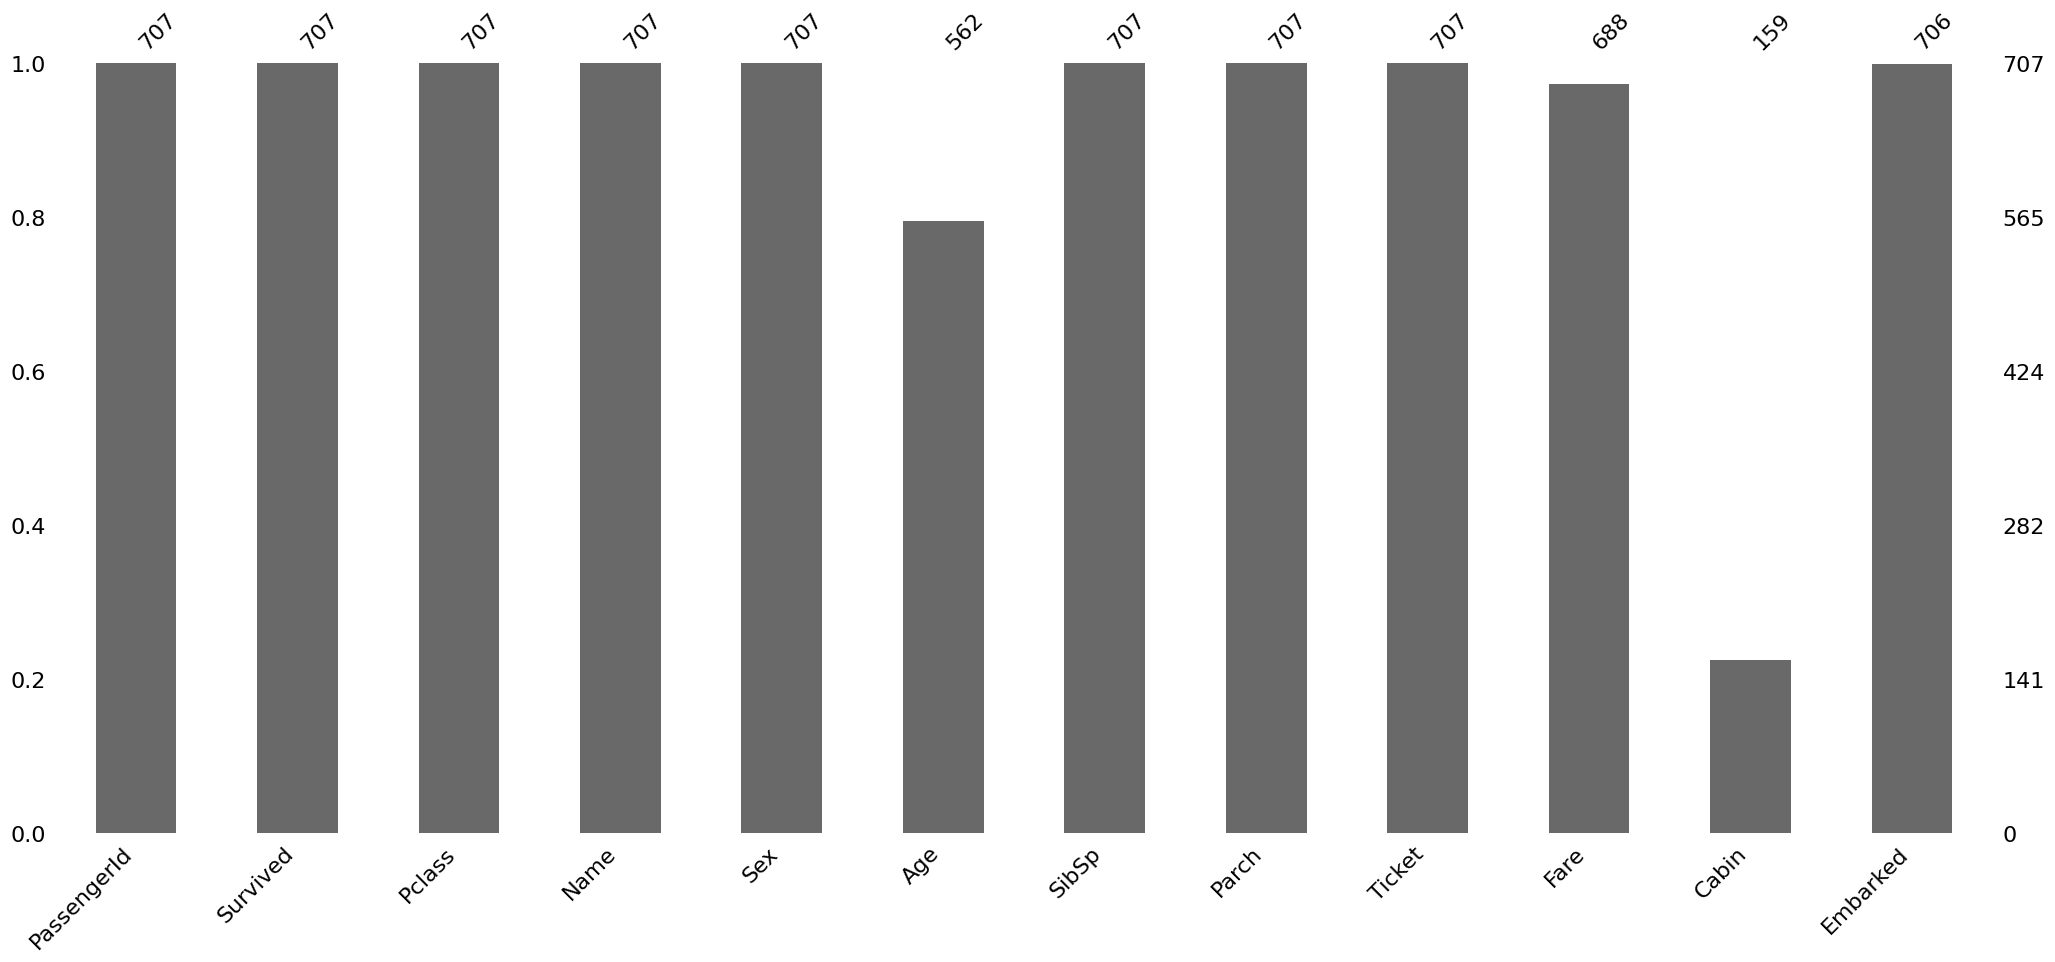

In [ ]:
msno.bar(data)

In [10]:
# Age
imp_mean_age = SimpleImputer(missing_values=np.nan, strategy='mean')
data.iloc[:,5:6] = imp_mean_age.fit_transform(data.iloc[:,5:6])

In [11]:
# Fare
imp_mean_cabin = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data.iloc[:,9:10] = imp_mean_cabin.fit_transform(data.iloc[:,9:10])

In [14]:
# Cabin
imp_mean_cabin = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data.iloc[:,10:11] = imp_mean_cabin.fit_transform(data.iloc[:,10:11])

In [12]:
# Embarked
imp_mean_embarked = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data.iloc[:,11:12] = imp_mean_embarked.fit_transform(data.iloc[:,11:12])

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,C23 C25 C27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,144.542,C23 C25 C27,C
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,77.417,C23 C25 C27,Q
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,78.542,C23 C25 C27,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,C23 C25 C27,S


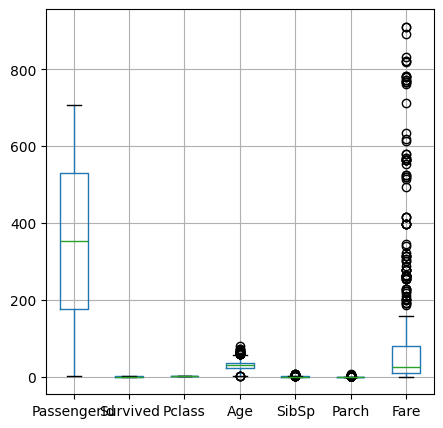

In [17]:
plt.figure(figsize=(5,5))
data.boxplot()
plt.show()

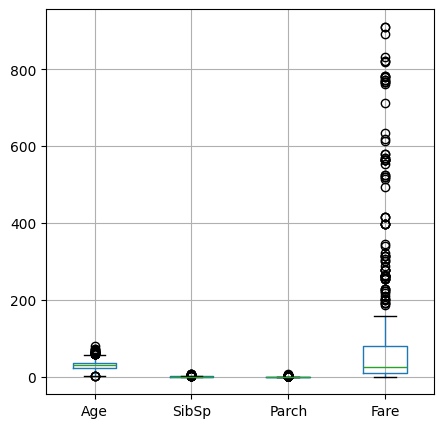

In [18]:
plt.figure(figsize=(5,5))
data.boxplot(column=['Age', 'SibSp', 'Parch', 'Fare'])
plt.show()

In [19]:
Q1_Age = data['Age'].quantile(0.25)
Q3_Age = data['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
lower_limit_Age = Q1_Age - 1.5 * IQR_Age
upper_limit_Age = Q3_Age + 1.5 * IQR_Age

In [28]:
data['Age'] = np.where(data['Age'] > upper_limit_Age, upper_limit_Age, np.where(data['Age'] < lower_limit_Age, lower_limit_Age, data['Age']))

In [21]:
Q1_sibsp = data['SibSp'].quantile(0.25)
Q3_sibsp = data['SibSp'].quantile(0.75)
IQR_sibsp = Q3_sibsp - Q1_sibsp
upper_limit_sibsp = Q3_sibsp + 1.5 * IQR_sibsp

In [22]:
data['SibSp'] = np.where(data['SibSp'] > upper_limit_sibsp, upper_limit_sibsp, data['SibSp'])


In [23]:
Q1_parch = data['Parch'].quantile(0.25)
Q3_parch = data['Parch'].quantile(0.75)
IQR_parch = Q3_parch - Q1_parch
upper_limit_parch = Q3_parch + 1.5 * IQR_parch

In [24]:
data['Parch'] = np.where(data['Parch'] > upper_limit_parch, upper_limit_parch, data['Parch'])


In [25]:
Q1_fare = data['Fare'].quantile(0.25)
Q3_fare = data['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
upper_limit_fare = Q3_fare + 1.5 * IQR_fare

In [26]:
data['Fare'] = np.where(data['Fare'] > upper_limit_fare, upper_limit_fare, data['Fare'])


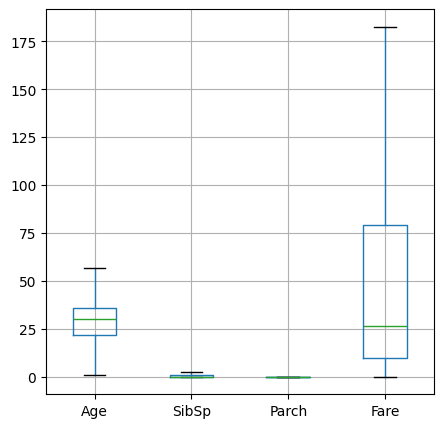

In [29]:
plt.figure(figsize=(5,5))
data.boxplot(column=['Age', 'SibSp', 'Parch', 'Fare'])
plt.show()

In [30]:
data.shape

(707, 12)

In [31]:
output_path = 'datapenumpang_clean.csv'
data.to_csv(output_path, index=False)